Cargando la BD [MNIST](https://http://yann.lecun.com/exdb/mnist/) en Keras

In [ ]:
import numpy
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Información sobre los datos de entrenamiento

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Información sobre los datos de prueba

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Arquitectura de la red

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

Definición de optimizador, función de pérdida y métrica

In [ ]:
model.compile(optimizer='rmsprop',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

Preparando los datos

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Entrenando la red

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
model.summary()

Epoch 1/5
469/469 [==============================] - 5s 3ms/step - loss: 0.2545 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9890
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________

Hacer algunas predicciones (probabilidad de que sea un digito 0-9)

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.3847894e-09, 1.8850860e-10, 6.5875838e-06, 3.8998311e-05,
       1.5849342e-12, 1.4303193e-07, 9.6273826e-14, 9.9995291e-01,
       2.8725535e-07, 1.0973401e-06], dtype=float32)

Verificación del dígito

In [ ]:
test_labels[0]

7

Evaluando la red

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9789
test_acc:  0.9789000153541565
test_loss:  0.06710641831159592


Cargar de nuevo la BD y visualizar el dígito de la predicción

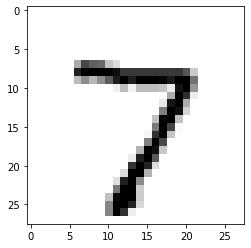

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Ejercicios:
----------
1. Retire el batch_size ¿Qué observa?
2. ¿Mejora la precisión (**accuracy**) si aumenta las pasadas (**epoch**)? ¿Por qué?
